In [1]:
#For the deep leaning network
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Conv2D, ZeroPadding2D, MaxPooling2D, AveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import losses
import keras.backend as K
#from keras import preprocessing.image.ImageDataGenerator

#For scores
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


#For preparing data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


#For manipulating and plotind data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#For loading pre-prepared data
import h5py
import numpy as np

from random import shuffle
from math import ceil
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [3]:
def make_model(opt, loss, input_shape, n_classes, chanDim):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(48, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(48, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(optimizer=opt, loss=loss, metrics=['acc',f1_score])
        
    return model

In [4]:
# summarize history for accuracy
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [5]:
# summarize history for loss
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [6]:
hdf5_path = 'chest_xray.hdf5'
subtract_mean = False

# open the hdf5 file
hdf5_file = h5py.File(hdf5_path, "r")

# subtract the training mean
if subtract_mean:
    mm = hdf5_file["train_mean"][0, ...]
    mm = mm[np.newaxis, ...]

# Total number of samples
data_num = hdf5_file["train_img"].shape[0]


images = hdf5_file["train_img"]
labels = hdf5_file["train_labels"]

#batch_size = 100
#nb_class = 2

# create list of batches to shuffle the data
#batches_list = list(range(int(ceil(float(data_num) / batch_size))))
#shuffle(batches_list)

# loop over batches
#for n, i in enumerate(batches_list):
#    i_s = i * batch_size  # index of the first image in this batch
#    i_e = min([(i + 1) * batch_size, data_num])  # index of the last image in this batch

    # read batch images and remove training mean
#    images = hdf5_file["train_img"][i_s:i_e, ...]
#    if subtract_mean:
#        images -= mm

    # read labels and convert to one hot encoding
#    labels = hdf5_file["train_labels"][i_s:i_e]
#    labels_one_hot = np.zeros((batch_size, nb_class))
#    labels_one_hot[np.arange(batch_size), labels] = 1

#    print(n+1, '/', len(batches_list))

#    print(labels[0], labels_one_hot[0, :])
#    plt.imshow(images[0])
#    plt.show()

#    if n == 5:  # break after 5 batches
#        break

#hdf5_file.close()

In [7]:
batch_size = 30
nb_class = 2
chanDim = -1

epochs = 100
lr = 1e-4

#opt = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
opt = optimizers.SGD(lr = lr, momentum = 0.9, decay = 0, nesterov = False)
loss = 'binary_crossentropy'
input_shape = (144, 144, 3)

print(input_shape)

(144, 144, 3)


In [8]:
nb_class = 2

#datagen = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
#    rotation_range=5,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    horizontal_flip=False)

## compute quantities required for featurewise normalization
## (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(x_train)

model = make_model(opt, loss, input_shape, nb_class, chanDim)
print(model.summary())

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 144, 144, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 142, 142, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 142, 142, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 71, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 71, 71, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 48)        13872     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 48)        20784     
__________

['/job:localhost/replica:0/task:0/device:GPU:0']

<HDF5 dataset "train_img": shape (4684, 144, 144, 3), type "|i1">
<HDF5 dataset "train_labels": shape (4684,), type "|i1">
Train on 3513 samples, validate on 1171 samples
Epoch 1/100
3513/3513 [==============================] - 17s 5ms/step - loss: 0.7787 - acc: 0.6433 - f1_score: 0.7221 - val_loss: 0.5432 - val_acc: 0.7814 - val_f1_score: 0.8460
Epoch 2/100
3513/3513 [==============================] - 15s 4ms/step - loss: 0.6236 - acc: 0.7401 - f1_score: 0.8069 - val_loss: 0.9590 - val_acc: 0.3544 - val_f1_score: nan
Epoch 3/100
3513/3513 [==============================] - 15s 4ms/step - loss: 0.5372 - acc: 0.7774 - f1_score: 0.8359 - val_loss: 0.7310 - val_acc: 0.5218 - val_f1_score: nan
Epoch 4/100
3513/3513 [==============================] - 15s 4ms/step - loss: 0.4959 - acc: 0.7896 - f1_score: 0.8442 - val_loss: 0.5226 - val_acc: 0.7746 - val_f1_score: nan
Epoch 5/100
3513/3513 [==============================] - 15s 4ms/step - loss: 0.4866 - acc: 0.7925 - f1_score: 0.8473 - val_lo

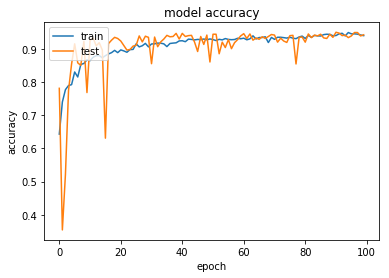

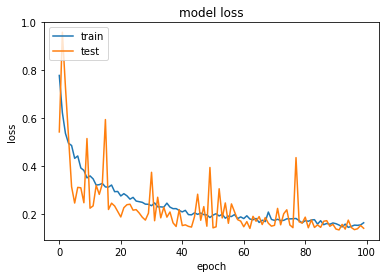

In [9]:
X = images
y = labels

print(X)
print(labels)

# Fit the model
history = model.fit(X, y, validation_split=0.25, epochs=epochs, batch_size=batch_size, verbose=1)

print("Accuracy: ", history.history['val_acc'][-1])

plot_acc(history)
plot_loss(history)

In [28]:
images_test = hdf5_file["test_img"]
labels_test = hdf5_file["test_labels"]

y_pred = model.predict(images_test, batch_size=None, verbose=1, steps=None)

y_pred = [1 if (y_pred[i] > 0.5) else 0 for i in range(len(y_pred))]

cm = confusion_matrix(labels_test, y_pred)
print(cm)

#do not work
print(f1_score(labels_as_array, y_pred_as_array))

FailedPreconditionError: Attempting to use uninitialized value conv2d_1/kernel
	 [[Node: conv2d_1/kernel/read = Identity[T=DT_FLOAT, _class=["loc:@conv2d_1/kernel"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_1/kernel)]]
	 [[Node: dense_2/Sigmoid/_27 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_476_dense_2/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'conv2d_1/kernel/read', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1426, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 759, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-0d5941da0215>", line 15, in <module>
    model = make_model(opt, loss, input_shape, nb_class, chanDim)
  File "<ipython-input-3-cf07836a6611>", line 3, in make_model
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
  File "/usr/local/lib/python3.6/dist-packages/keras/models.py", line 497, in add
    layer(x)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py", line 592, in __call__
    self.build(input_shapes[0])
  File "/usr/local/lib/python3.6/dist-packages/keras/layers/convolutional.py", line 138, in build
    constraint=self.kernel_constraint)
  File "/usr/local/lib/python3.6/dist-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py", line 416, in add_weight
    constraint=constraint)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 396, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/variables.py", line 235, in __init__
    constraint=constraint)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/variables.py", line 397, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py", line 142, in identity
    return gen_array_ops.identity(input, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 3187, in identity
    "Identity", input=input, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value conv2d_1/kernel
	 [[Node: conv2d_1/kernel/read = Identity[T=DT_FLOAT, _class=["loc:@conv2d_1/kernel"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_1/kernel)]]
	 [[Node: dense_2/Sigmoid/_27 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_476_dense_2/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
